# Name: Angela Wilburn

## Course: IT445 Programming for Data Analysis

### Assignment: Final_Project_Milestone_4

#### Description: This notebook explores the sentiment analysis data used throughout my final project deliverables. It employs data mining techniques to draw further insights into the IMDB movie reviews
##### The data in this notebook is movie metadata and reviews from IMDB and Sentiment training data. 
##### References: 
##### Aditya Pal, Abhilash Barigidad, Abhijit Mustafi. (2020). IMDb Movie Reviews Dataset. 
     IEEE Dataport. https://dx.doi.org/10.21227/zm1y-b270
##### MATTHEW WALLER, MBD Movie Reviews For Binary Sentiment Analysis
    https://www.kaggle.com/datasets/mwallerphunware/imbd-movie-reviews-for-binary-sentiment-analysis

# Import data for analysis

In [1]:
# import necessary libraries to load the data 
import pandas as pd 

# read in the CSV file of user comments and sentiment analysis
movie_data= pd.read_csv("clean_movie_metadata_sentiment.csv")

# show the first 5 rows of the data 
movie_data.head(5)

,name,movie_rated,run_length,Combined Genre,release_date,IMDB_rating,reviewer_rating,review_date,review,release_country,sentiment
0,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2020-02-12,"Confidently directed, dark, brooding, and pack...",USA,1
1,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,I got to see The Dark Knight on Wednesday nigh...,USA,1
2,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-09,We've been subjected to enormous amounts of hy...,USA,1
3,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,9,2018-10-12,First I'd controversially like to point out th...,USA,1
4,The Dark Knight,PG-13,2h 32min,Action,2008-07-18,9.0,10,2008-07-20,"I couldn't believe ""The Dark knight"" could liv...",USA,1


## View DataFrame information

In [2]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259472 entries, 0 to 1259471
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   name             1259472 non-null  object 
 1   movie_rated      1259472 non-null  object 
 2   run_length       1259472 non-null  object 
 3   Combined Genre   1259472 non-null  object 
 4   release_date     1259472 non-null  object 
 5   IMDB_rating      1259472 non-null  float64
 6   reviewer_rating  1259472 non-null  int64  
 7   review_date      1259472 non-null  object 
 8   review           1259472 non-null  object 
 9   release_country  1259472 non-null  object 
 10  sentiment        1259472 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 105.7+ MB


## Preform group by functions to create a subset DataFrames for analysis 

In [3]:
# Group the data by name and calculate the average reviewer rating, sentiment, and IMDB rating for each genre
avg_by_title = movie_data.groupby('name').agg({'sentiment': 'mean'}).reset_index()

# Sort the DataFrame by sentiment in descending order and get the top 20
top_20 = avg_by_title.sort_values(by='sentiment', ascending=False).head(20)

# Merge the top 20 DataFrame with the original DataFrame to get the corresponding reviews
top_20_with_reviews = pd.merge(top_20, movie_data[['name', 'review']], on='name', how='left')

top_20_with_reviews.head(5)

,name,sentiment,review
0,The Best Years of Our Lives,0.973913,"In 2004, I wrote the following statements on a..."
1,The Best Years of Our Lives,0.973913,One of the great things about The Best Years o...
2,The Best Years of Our Lives,0.973913,The Best Years of Our Lives (1946)<br/><br/>Th...
3,The Best Years of Our Lives,0.973913,"Sometimes, but very rarely, a movie tells a st..."
4,The Best Years of Our Lives,0.973913,There are several thoughtful reviews of this m...


In [4]:
# Sort the DataFrame by sentiment in ascending order and get the bottom 20
bottom_20 = avg_by_title.sort_values(by='sentiment', ascending=True).head(20)

# Merge the top 20 DataFrame with the original DataFrame to get the corresponding reviews
bottom_20_with_reviews = pd.merge(bottom_20, movie_data[['name', 'review']], on='name', how='left')

# Show the top 5 rows in the DataFrame
bottom_20_with_reviews.head()

,name,sentiment,review
0,The Happening,0.230129,I haven't seen an M. Night Shyamalan movie sin...
1,The Happening,0.230129,"""The Happening"", which was released here in Fr..."
2,The Happening,0.230129,Who keeps giving M. Night Shyamalan money to m...
3,The Happening,0.230129,I hate this. I want to tell you guys that this...
4,The Happening,0.230129,M. Night Shyamalan's first Rated R film and he...


## Preprocessing steps, including a custom function for repetitive steps for cleaning data 

In [5]:
# Import necessary libraries. 
# 're' for regular expressions, 
# 'nltk.stem' for lemmatizing words, 
import re
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer. This will lemmatize words, reducing them to their root form.
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    This function takes a string of text as input and returns a cleaned version of the text.
    The cleaning process involves removing HTML tags, converting to lowercase, replacing newline and carriage return characters with spaces, 
    tokenizing the text by splitting on spaces, lemmatizing the words, and joining the words back into a single string.
    
    Parameters:
    text (str): The text string that needs cleaning.

    Returns:
    cleaned_text (str): The cleaned text.
    """

    # Remove HTML tags using a regular expression. The '<.*?>' pattern matches any text in angle brackets.
    # Convert the text to lowercase to ensure consistency for further analysis.
    cleaned_text = re.sub('<.*?>', ' ', str(text)).lower()
    
    # Replace newline ('\n') and carriage return ('\r') characters with spaces. These characters can interfere with further text processing.
    cleaned_text = cleaned_text.replace('\n', ' ').replace('\r', ' ')

    # Tokenize the text by splitting on spaces. This breaks the text down into individual words, which can be analyzed separately.
    words = cleaned_text.split()
    
    # Lemmatize the words. This reduces each word to its root form, which can provide a more accurate analysis of the text.
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string. This is done to reconstruct the text after cleaning and tokenizing.
    cleaned_text = ' '.join(words)

    # Return the cleaned text.
    return cleaned_text


## Use NumPY vectorize to process clean text function for top 20 reviews more quickly than with using pandas
#### Note: I did try parallel computing, but because I am using a CSV with a comma delimiter, I did run into some issues

In [6]:
# Impoer necessary libraries 
import numpy as np

# Apply clean text function to DataFrame using NumPy vectorize
top_20_with_reviews['cleaned_reviews'] = np.vectorize(clean_text)(top_20_with_reviews['review'])

# Show top 5 records of DataFrame to Validate Clean Reviews 
top_20_with_reviews.head()

,name,sentiment,review,cleaned_reviews
0,The Best Years of Our Lives,0.973913,"In 2004, I wrote the following statements on a...","in 2004, i wrote the following statement on an..."
1,The Best Years of Our Lives,0.973913,One of the great things about The Best Years o...,one of the great thing about the best year of ...
2,The Best Years of Our Lives,0.973913,The Best Years of Our Lives (1946)<br/><br/>Th...,the best year of our life (1946) the whole poi...
3,The Best Years of Our Lives,0.973913,"Sometimes, but very rarely, a movie tells a st...","sometimes, but very rarely, a movie tell a sto..."
4,The Best Years of Our Lives,0.973913,There are several thoughtful reviews of this m...,there are several thoughtful review of this mo...


# Word Cloud Analysis 

## Tokenize positive reviews into words for word cloud

In [7]:
# Import the necessary library to preform word tokenization 
from nltk.tokenize import word_tokenize

# Tokenize reviews into words
tokenized_words = top_20_with_reviews['cleaned_reviews'].apply(word_tokenize)

# View tokenized words to verify the tokenization worked
print(tokenized_words)

0        [in, 2004, ,, i, wrote, the, following, statem...
1        [one, of, the, great, thing, about, the, best,...
2        [the, best, year, of, our, life, (, 1946, ), t...
3        [sometimes, ,, but, very, rarely, ,, a, movie,...
4        [there, are, several, thoughtful, review, of, ...
                               ...                        
10722    [i, have, watched, this, movie, 3, times, ,, a...
10723    [i, 've, seen, this, movie, already, couple, o...
10724    [this, wa, the, first, geoffrey, rush, movie, ...
10725    [thank, you, scott, hicks, ,, david, and, gill...
10726    [i, am, not, a, big, fan, of, the, piano, ,, o...
Name: cleaned_reviews, Length: 10727, dtype: object


## Remove Stop Words and create a word cloud for Positive Reviews 

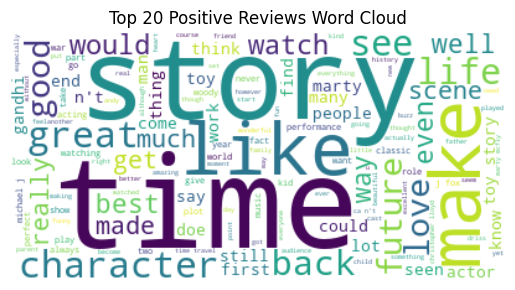

In [8]:
# Import necessary libraries. 
# 'nltk.corpus' for accessing the list of English stopwords, 
# 'wordcloud' for generating the word cloud, 
# and 'matplotlib.pyplot' for plotting the word cloud.
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the list of English stopwords from the nltk.corpus library.
stopwords = set(stopwords.words('english'))

# Add common words that would be in a movie review or ones that do not make sense to the set of stopwords.
# These words are not informative for the analysis of positive reviews.
stopwords.update(['movie', 'film', 'wa', 'one', 'ha', 'also'])

# Flatten the list of tokenized words for positive reviews.
# This is done to simplify the process of generating the word cloud.
pos_tokenized_words = [word for review in tokenized_words[top_20_with_reviews.index] for word in review]

# Generate the word cloud using the tokenized words.
# The word cloud visually represents the most common words in the positive reviews.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(pos_tokenized_words))

# Display the word cloud.
# The 'interpolation' parameter is set to 'bilinear' to make the displayed image appear more smooth.
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top 20 Positive Reviews Word Cloud")
plt.axis('off')
plt.show()

## Use NumPY vectorize to process clean text function for top 20 reviews more quickly than with using pandas

In [9]:
# Import necessary libraries 
import numpy as np

# Apply clean text function to DataFrame using NumPy vectorize
bottom_20_with_reviews['cleaned_reviews'] = np.vectorize(clean_text)(bottom_20_with_reviews['review'])

# Show top 5 records of DataFrame to Validate Clean Reviews 
bottom_20_with_reviews.head()

,name,sentiment,review,cleaned_reviews
0,The Happening,0.230129,I haven't seen an M. Night Shyamalan movie sin...,i haven't seen an m. night shyamalan movie sin...
1,The Happening,0.230129,"""The Happening"", which was released here in Fr...","""the happening"", which wa released here in fra..."
2,The Happening,0.230129,Who keeps giving M. Night Shyamalan money to m...,who keep giving m. night shyamalan money to ma...
3,The Happening,0.230129,I hate this. I want to tell you guys that this...,i hate this. i want to tell you guy that this ...
4,The Happening,0.230129,M. Night Shyamalan's first Rated R film and he...,m. night shyamalan's first rated r film and he...


## Tokenize negative reviews into words for word cloud

In [10]:
# Import the necessary library to preform word tokenization 
from nltk.tokenize import word_tokenize

# Tokenize reviews into words
tokenized_words = bottom_20_with_reviews['cleaned_reviews'].apply(word_tokenize)

# View tokenized words to verify the tokenization worked
print(tokenized_words)

0        [i, have, n't, seen, an, m., night, shyamalan,...
1        [``, the, happening, '', ,, which, wa, release...
2        [who, keep, giving, m., night, shyamalan, mone...
3        [i, hate, this, ., i, want, to, tell, you, guy...
4        [m., night, shyamalan, 's, first, rated, r, fi...
                               ...                        
34584    [going, to, this, movie, i, expected, some, aw...
34585    [when, making, a, film, which, focus, on, a, s...
34586    [it, is, not, an, easy, task, to, make, a, mov...
34587    [this, wa, panned, by, a, lot, of, critic, and...
34588    [*, *, *, warning, !, spoiler, ahead, *, *, *,...
Name: cleaned_reviews, Length: 34589, dtype: object


## Remove Stop Words and create a word cloud for Negative Reviews

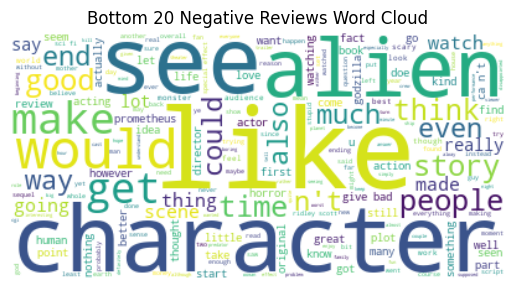

In [11]:
# Import necessary libraries. 
# 'nltk.corpus' for accessing the list of English stopwords, 
# 'wordcloud' for generating the word cloud, 
# and 'matplotlib.pyplot' for plotting the word cloud.
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the list of English stopwords from the nltk.corpus library.
stopwords = set(stopwords.words('english'))

# Add common words that would be in a movie review or ones that do not make sense to the set of stopwords.
# These words are not informative for the analysis of negative reviews.
stopwords.update(['movie', 'film', 'wa', 'one', 'ha',])

# Flatten the list of tokenized words for negative reviews.
# This is done to simplify the process of generating the word cloud.
neg_tokenized_words = [word for review in tokenized_words[bottom_20_with_reviews.index] for word in review]

# Generate the word cloud using the tokenized words.
# The word cloud visually represents the most common words in the negative reviews.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(neg_tokenized_words))

# Display the word cloud.
# The 'interpolation' parameter is set to 'bilinear' to make the displayed image appear more smooth.
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Bottom 20 Negative Reviews Word Cloud")
plt.axis('off')
plt.show()


# Named Entity Recognition Analysis

## Create a function 'extract_entities' for entity extraction that can be used on multiple DataFrames 

In [12]:
# Import the SpaCy library for advanced Natural Language Processing (NLP) in Python.
import spacy

# Load the SpaCy model 'en_core_web_sm'. This is a small English model trained on web text.
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    """
    This function takes a text string as input and returns a dictionary of entities extracted from the text.
    Each key in the dictionary is a type of entity (e.g., 'GPE', 'PERSON'), and the corresponding value is a list of instances of that entity found in the text.
    
    Parameters:
    text (str): The text string from which to extract entities.

    Returns:
    entities (dict): A dictionary of entities extracted from the text.
    """

    # Apply the SpaCy model to the text. This returns a Doc object that contains the processed text.
    doc = nlp(text)
    
    # Initialize a dictionary to hold the entities. Each key is a type of entity, and the corresponding value is an empty list.
    entities = {ent.label_: [] for ent in doc.ents}

    # Iterate over the entities in the Doc object. For each entity, append the entity text to the corresponding list in the dictionary.
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)

    # Return the dictionary of entities.
    return entities


## Extract Entities from Top 20 Reviews and create plots 

In [13]:
# Apply extract_entities function to the top reviews 
top_20_with_reviews['entities'] = top_20_with_reviews['review'].apply(extract_entities)

In [14]:
# Validate the extraction worked by showing the top 5 rows of the DataFrame
top_20_with_reviews.head()

,name,sentiment,review,cleaned_reviews,entities
0,The Best Years of Our Lives,0.973913,"In 2004, I wrote the following statements on a...","in 2004, i wrote the following statement on an...","{'DATE': ['2004', 'The Best Years of Our Lives..."
1,The Best Years of Our Lives,0.973913,One of the great things about The Best Years o...,one of the great thing about the best year of ...,"{'CARDINAL': ['One', 'three', 'two', 'three', ..."
2,The Best Years of Our Lives,0.973913,The Best Years of Our Lives (1946)<br/><br/>Th...,the best year of our life (1946) the whole poi...,"{'DATE': ['The Best Years of Our Lives', 'toda..."
3,The Best Years of Our Lives,0.973913,"Sometimes, but very rarely, a movie tells a st...","sometimes, but very rarely, a movie tell a sto...","{'ORDINAL': ['first'], 'CARDINAL': ['three', '..."
4,The Best Years of Our Lives,0.973913,There are several thoughtful reviews of this m...,there are several thoughtful review of this mo...,"{'PERSON': ['Fred', 'Andrews', 'Fred', 'Homer'..."


In [15]:
# Convert the 'entities' column into its own DataFrame. 
# This is done because each cell in the 'entities' column contains multiple values (entities), 
# and I want to analyze each entity separately.
entities_df = top_20_with_reviews['entities'].apply(pd.Series)

# Concatenate the new 'entities' DataFrame with the original DataFrame, dropping the original 'entities' column. 
# This creates a DataFrame where each entity has its own column, making it easier to analyze the entities.
top_20_with_reviews = pd.concat([top_20_with_reviews.drop('entities', axis=1), entities_df], axis=1)

In [16]:
# Show all of the columns in the DataFrame
top_20_with_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10727 entries, 0 to 10726
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10727 non-null  object 
 1   sentiment        10727 non-null  float64
 2   review           10727 non-null  object 
 3   cleaned_reviews  10727 non-null  object 
 4   DATE             5441 non-null   object 
 5   CARDINAL         6148 non-null   object 
 6   GPE              3231 non-null   object 
 7   EVENT            700 non-null    object 
 8   WORK_OF_ART      2400 non-null   object 
 9   ORG              5343 non-null   object 
 10  LAW              115 non-null    object 
 11  PERSON           8156 non-null   object 
 12  ORDINAL          3311 non-null   object 
 13  LOC              850 non-null    object 
 14  TIME             1307 non-null   object 
 15  NORP             2835 non-null   object 
 16  PRODUCT          686 non-null    object 
 17  QUANTITY    

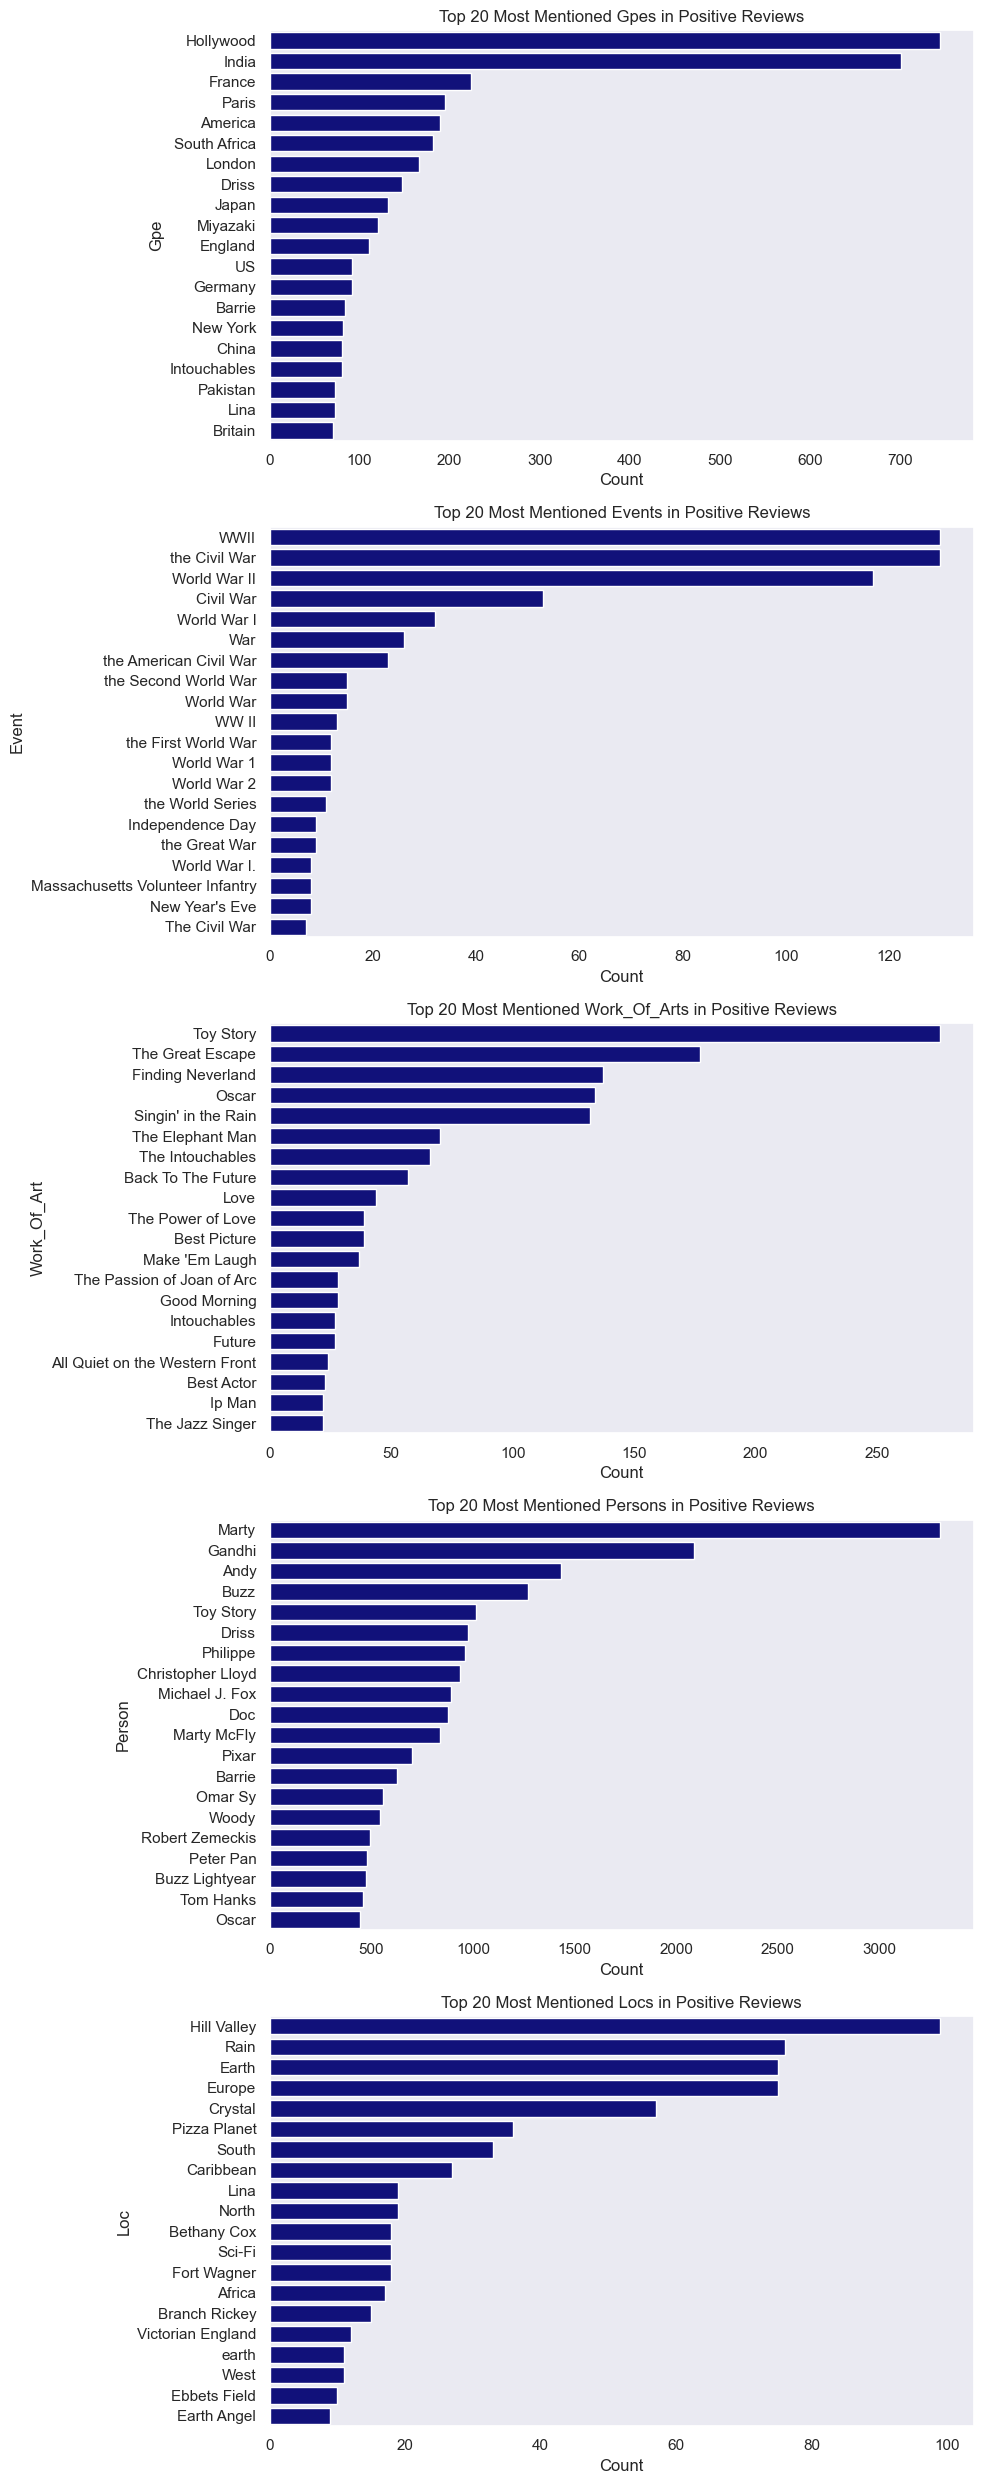

In [17]:
# Import necessary libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Define the entity types we're interested in for analysis. 
# These entities will be used for creating separate plots.
entity_types = ['GPE', 'EVENT', 'WORK_OF_ART', 'PERSON', 'LOC']

# Set the theme for bar charts in Seaborn to 'dark'.
sns.set_theme(style='dark')

# Create a figure with a subplot for each entity type. 
# This allows for dynamic visualization changes for different entity analyses.
fig, axs = plt.subplots(len(entity_types), figsize=(10, 5*len(entity_types)))

for i, entity_type in enumerate(entity_types):
    # Flatten the entity column into a single pandas Series. 
    # This is done to simplify the process of counting entity frequencies.
    flat_entity = pd.Series([item for sublist in top_20_with_reviews[entity_type].dropna() for item in sublist])

    # Count the frequency of each entity. 
    # This gives us an idea of the most common entities in the reviews.
    entity_counts = flat_entity.value_counts()

    # Get the top 20 most mentioned entities. 
    # This will be used for the bar plot.
    top_entities = pd.DataFrame(entity_counts.head(20))

    # Add column names for clarity.
    top_entities.reset_index(inplace=True)
    top_entities.columns = [entity_type, 'Count']

    # Plot the results in the i-th subplot.
    sns.barplot(x='Count', y=entity_type, data=top_entities, ax=axs[i], color='darkblue')
    axs[i].set_title(f'Top 20 Most Mentioned {entity_type.title()}s in Positive Reviews')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(entity_type.title())

# Automatically adjust the subplot layout for better visualization.
plt.tight_layout()

# Show the plots.
plt.show()


## Extract Entities from Bottom Reviews and create plots 

In [18]:
# Apply the extract_entities function to the top reviews 
bottom_20_with_reviews['entities'] = bottom_20_with_reviews['review'].apply(extract_entities)

In [19]:
# Validate bottom reviews DataFrame by viewing the top 5 rows 
bottom_20_with_reviews.head()

,name,sentiment,review,cleaned_reviews,entities
0,The Happening,0.230129,I haven't seen an M. Night Shyamalan movie sin...,i haven't seen an m. night shyamalan movie sin...,"{'WORK_OF_ART': ['The Happening', 'The Happeni..."
1,The Happening,0.230129,"""The Happening"", which was released here in Fr...","""the happening"", which wa released here in fra...","{'WORK_OF_ART': ['The Happening', '""The Happen..."
2,The Happening,0.230129,Who keeps giving M. Night Shyamalan money to m...,who keep giving m. night shyamalan money to ma...,"{'PERSON': ['M. Night Shyamalan', 'Lady', 'Wah..."
3,The Happening,0.230129,I hate this. I want to tell you guys that this...,i hate this. i want to tell you guy that this ...,"{'PERSON': ['Shyamalan', 'Mark Wahlberg', 'Osc..."
4,The Happening,0.230129,M. Night Shyamalan's first Rated R film and he...,m. night shyamalan's first rated r film and he...,"{'PERSON': ['M. Night Shyamalan's', 'Mark Wahl..."


In [20]:
# Convert the 'entities' column into its own DataFrame. 
# This is done because each cell in the 'entities' column contains multiple values (entities), 
# and I want to analyze each entity separately.
entities_df = bottom_20_with_reviews['entities'].apply(pd.Series)

# Concatenate the new 'entities' DataFrame with the original DataFrame, dropping the original 'entities' column. 
# This creates a DataFrame where each entity has its own column, making it easier to analyze the entities.
bottom_20_with_reviews = pd.concat([bottom_20_with_reviews.drop('entities', axis=1), entities_df], axis=1)

In [21]:
# Show all of the columns in the bottom DataFrame
bottom_20_with_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34589 entries, 0 to 34588
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             34589 non-null  object 
 1   sentiment        34589 non-null  float64
 2   review           34589 non-null  object 
 3   cleaned_reviews  34589 non-null  object 
 4   WORK_OF_ART      6083 non-null   object 
 5   ORDINAL          10200 non-null  object 
 6   DATE             13220 non-null  object 
 7   CARDINAL         19245 non-null  object 
 8   ORG              16628 non-null  object 
 9   PRODUCT          2043 non-null   object 
 10  PERSON           23643 non-null  object 
 11  NORP             7664 non-null   object 
 12  GPE              12618 non-null  object 
 13  LOC              3766 non-null   object 
 14  TIME             8841 non-null   object 
 15  LAW              439 non-null    object 
 16  FAC              1255 non-null   object 
 17  EVENT       

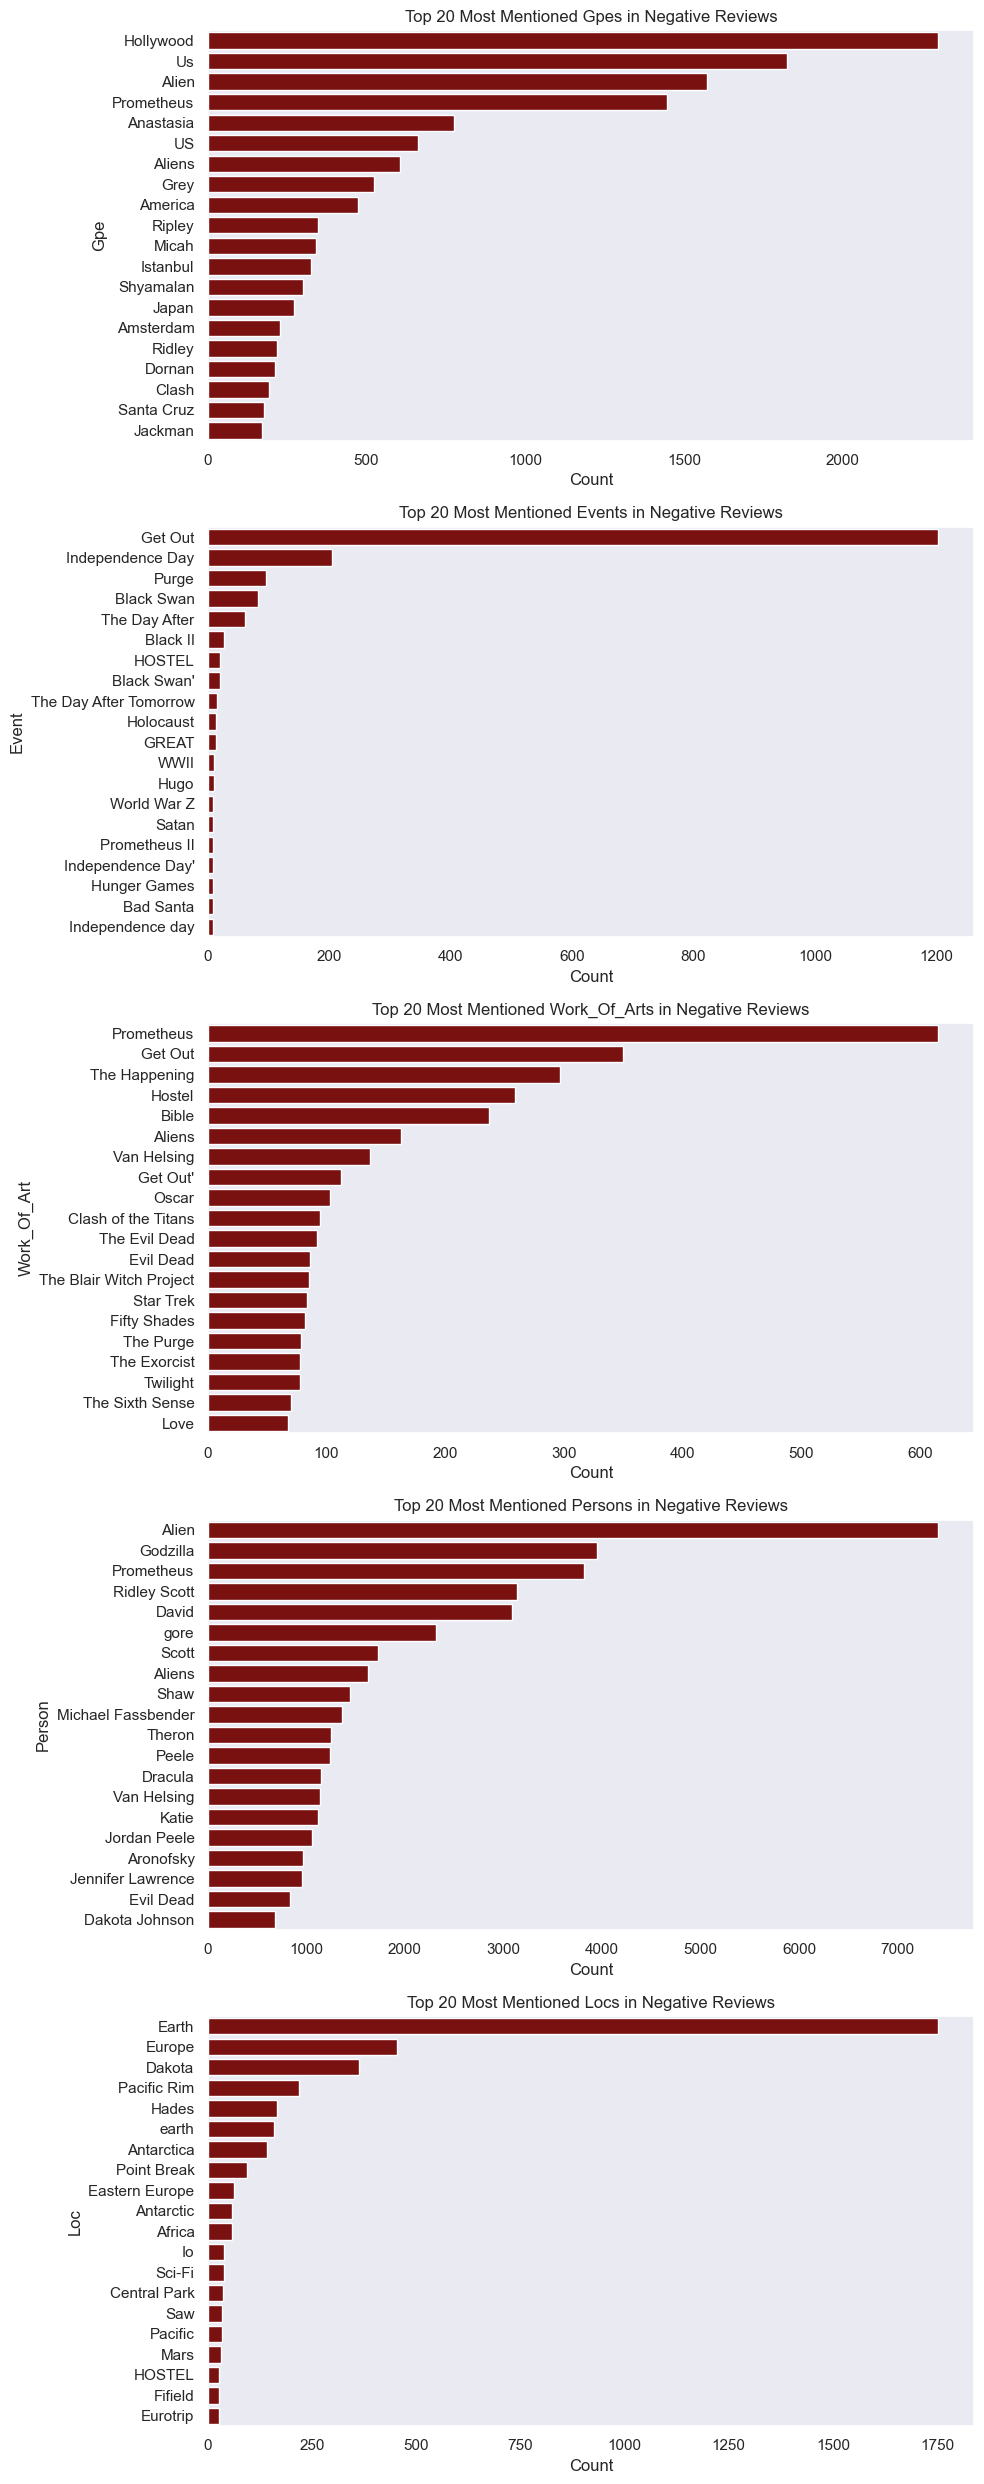

In [22]:
# Import necessary libraries. 
# 'matplotlib.pyplot' for creating plots, 
# and 'seaborn' for making attractive and informative statistical graphics.
import matplotlib.pyplot as plt
import seaborn as sns

# Define the entity types we're interested in for analysis. 
# These entities will be used for creating separate plots.
entity_types = ['GPE','EVENT', 'WORK_OF_ART', 'PERSON', 'LOC']

# Create a figure with a subplot for each entity type. 
# This allows for dynamic visualization changes for different entity analyses.
fig, axs = plt.subplots(len(entity_types), figsize=(10, 5*len(entity_types)))

for i, entity_type in enumerate(entity_types):
    # Flatten the entity column into a single pandas Series. 
    # This is done to simplify the process of counting entity frequencies.
    flat_entity = pd.Series([item for sublist in bottom_20_with_reviews[entity_type].dropna() for item in sublist])

    # Count the frequency of each entity. 
    # This gives us an idea of the most common entities in the reviews.
    entity_counts = flat_entity.value_counts()

    # Get the top 20 most mentioned entities. 
    # This will be used for the bar plot.
    top_entities = pd.DataFrame(entity_counts.head(20))

    # Add column names for clarity.
    top_entities.reset_index(inplace=True)
    top_entities.columns = [entity_type, 'Count']

    # Plot the results in the i-th subplot.
    sns.barplot(x='Count', y=entity_type, data=top_entities, ax=axs[i], color='darkred')
    axs[i].set_title(f'Top 20 Most Mentioned {entity_type.title()}s in Negative Reviews')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(entity_type.title())

# Automatically adjust the subplot layout for better visualization.
plt.tight_layout()

# Show the plots.
plt.show()